In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import random

In [20]:
df=pd.read_excel("D:\dataset_fyp\\abc.xlsx")
df.head(5)

,Date/Time,Air Temperature,Temperature,BPM,Sys,Dias,Activity,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2022-07-01 00:00:00,31,NaN,NaN,NaN,NaN,Sleeping,NaN,NaN,NaN,NaN
1,2022-07-01 01:00:00,31,NaN,NaN,NaN,NaN,Sleeping,NaN,NaN,Assumptions,NaN
2,2022-07-01 02:00:00,30,NaN,NaN,NaN,NaN,Sleeping,NaN,NaN,air temp,39/25
3,2022-07-01 03:00:00,30,NaN,NaN,NaN,NaN,Sleeping,NaN,NaN,body temp,36.27
4,2022-07-01 04:00:00,30,NaN,NaN,NaN,NaN,Sleeping,NaN,NaN,BPM,65


In [21]:
df=df.iloc[:,0:7]
df=df.fillna(0)
df['Date/Time']=df['Date/Time'].astype('str')
#df.set_index('Date/Time',inplace=True)
print(df.head(5))
df.dtypes
data=df.values
data=np.array(data)
print(np.array(data))

                 Date/Time  Air Temperature  Temperature  BPM  Sys  Dias  \
0  2022-07-01 00:00:00.000               31          0.0  0.0  0.0   0.0   
1  2022-07-01 01:00:00.000               31          0.0  0.0  0.0   0.0   
2  2022-07-01 02:00:00.000               30          0.0  0.0  0.0   0.0   
3  2022-07-01 03:00:00.000               30          0.0  0.0  0.0   0.0   
4  2022-07-01 04:00:00.000               30          0.0  0.0  0.0   0.0   

   Activity  
0  Sleeping  
1  Sleeping  
2  Sleeping  
3  Sleeping  
4  Sleeping  
[['2022-07-01 00:00:00.000' 31 0.0 ... 0.0 0.0 'Sleeping']
 ['2022-07-01 01:00:00.000' 31 0.0 ... 0.0 0.0 'Sleeping']
 ['2022-07-01 02:00:00.000' 30 0.0 ... 0.0 0.0 'Sleeping']
 ...
 ['2022-07-30 20:59:59.535' 28 0.0 ... 0.0 0.0 'Walking']
 ['2022-07-30 21:59:59.530' 28 0.0 ... 0.0 0.0 'Walking']
 ['2022-07-30 22:59:59.525' 28 0.0 ... 0.0 0.0 'Sitting']]


In [22]:
avgtemp = 36.27
avgsys = 110
avgdias = 70
avghr = 81
itemp = 0.1
dtemp = -0.1
#mtemp = 0.25
#etemp = 0.5
#atemp = -0.25
#ntemp = -0.5
wsys = -4.11
wdias = -1.79
wtemp = 0.25
whr = (60*avghr)/100
stsys = -((5*avgsys)/100)
stdias = -((5*avgdias)/100)
sttemp = 0
sthr = -((7*avghr)/100)
slsys = -((10*avgsys)/100)
sldias = -((10*avgdias)/100)
sltemp = -0.5
slhr = -((20*avghr)/100)

In [23]:
data1=data
for i in range(len(data1)):
    dtime=str(data1[i][0])
    dtime=dtime.replace(' ','')
    dtime=dtime.replace('-','')
    dtime=dtime.replace(':','')
    dtime=int(dtime[8:10])
    
    if data1[i][1] > 35: data1[i][2]=avgtemp+(2*itemp)+random.uniform(0.1,0.2)
    if data1[i][1] > 30 and data1[i][1] < 35: data1[i][2]=avgtemp+itemp+random.uniform(0.1,0.2)
    if data1[i][1] > 25 and data1[i][1] < 30: data1[i][2]=avgtemp+dtemp+random.uniform(0.1,0.2)
    if data1[i][1] < 25: data1[i][2]=avgtemp+(2*dtemp)+random.uniform(0.1,0.2)
        
    #if dtime < 12:
    #    if data1[i][1] > avgtemp:
    #        data1[i][2]=avgtemp+mtemp+random.uniform(0.1,0.5)
    #elif dtime >= 12 and dtime < 16:
    #    data1[i][2]=avgtemp+etemp+random.uniform(0.1,0.5)
    #elif dtime >= 16 and dtime < 20:
    #    data1[i][2]=avgtemp+atemp+random.uniform(0.1,0.5)
    #elif dtime >=20:
    #    data1[i][2]=avgtemp+ntemp+random.uniform(0.1,0.5)
        
    if data1[i][6]=='Sleeping':
        data1[i][4]=avgsys+slsys+random.randrange(2,6)
        data1[i][5]=avgdias+sldias+random.randrange(2,6)
        data1[i][2]=avgtemp+sltemp+random.uniform(0.1,0.5)
        data1[i][3]=avghr+slhr+random.randrange(1,3)
        
    elif data1[i][6]=='Sitting':
        data1[i][4]=avgsys+stsys+random.randrange(2,6)
        data1[i][5]=avgdias+stdias+random.randrange(2,6)
        data1[i][2]=avgtemp+sttemp+random.uniform(0.1,0.5)
        data1[i][3]=avghr+sthr+random.randrange(1,3)
        
    elif data1[i][6]=='Walking':
        data1[i][4]=avgsys+wsys+random.randrange(2,6)
        data1[i][5]=avgdias+wdias+random.randrange(2,6)
        data1[i][2]=avgtemp+wtemp+random.uniform(0.1,0.5)
        data1[i][3]=avghr+whr+random.randrange(1,3)


In [24]:
new=pd.DataFrame(data1,columns=['Date/Time','Air Temperature','Temperature','BPM','Sys','Dias','Activity'])
new.set_index('Date/Time',inplace=True)
new.head(5)

,Air Temperature,Temperature,BPM,Sys,Dias,Activity
Date/Time,,,,,,
2022-07-01 00:00:00.000,31,36.020782,66.8,103.0,67.0,Sleeping
2022-07-01 01:00:00.000,31,36.241318,66.8,103.0,66.0,Sleeping
2022-07-01 02:00:00.000,30,35.958498,65.8,103.0,68.0,Sleeping
2022-07-01 03:00:00.000,30,36.078727,66.8,102.0,67.0,Sleeping
2022-07-01 04:00:00.000,30,35.953839,65.8,101.0,67.0,Sleeping


<AxesSubplot:xlabel='Date/Time', ylabel='Temperature'>

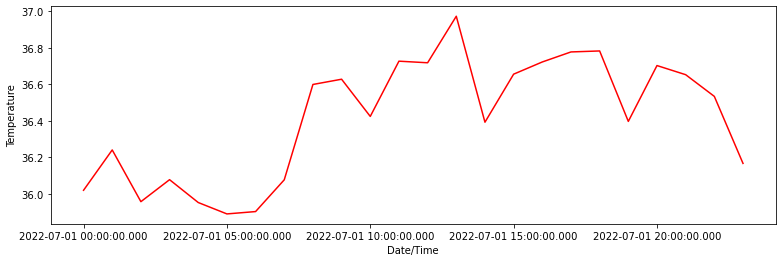

In [25]:
temp=new[0:24]['Temperature']
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Temperature")
temp.plot(color='red')


<AxesSubplot:xlabel='Date/Time', ylabel='BPM'>

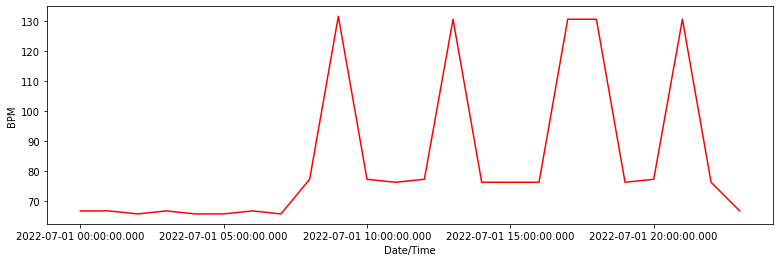

In [26]:
temp=new[0:24]['BPM']
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("BPM")
temp.plot(color='red')


<AxesSubplot:xlabel='Date/Time', ylabel='Sys'>

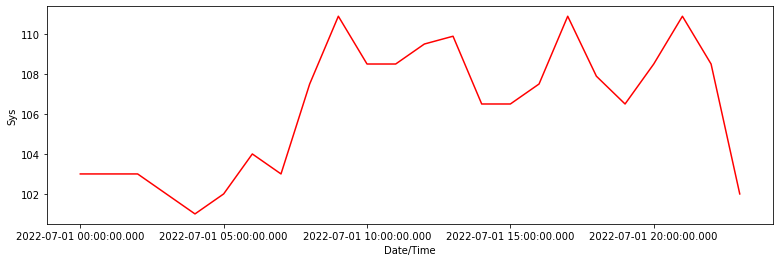

In [27]:
temp=new[0:24]['Sys']
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Sys")
temp.plot(color='red')


<AxesSubplot:xlabel='Date/Time', ylabel='Dias'>

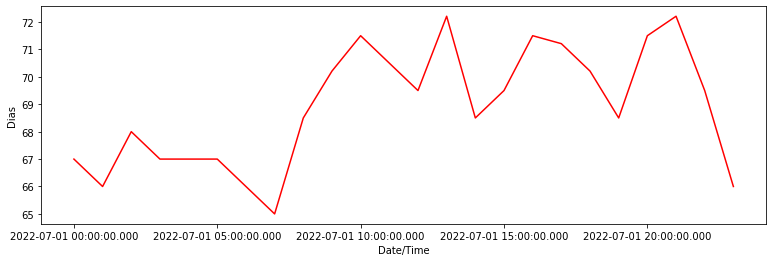

In [28]:
temp=new[0:24]['Dias']
plt.figure(figsize=(13,4)) 
plt.xlabel("Time(t)")
plt.ylabel("Dias")
temp.plot(color='red')


In [30]:
new.to_csv(r"D:\dataset_fyp\1hourTS.csv")